#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import datetime

#### Load data

In [2]:
df = pd.read_stata('DS190_Ad2013v1_Distributable/Data/Stata/Ad2013v1.dta')

In [6]:
# Select relevant columns
df_age = pd.DataFrame()
df_age['DobBMom'] = df['dobyrmom']
df_age['DobChild'] = df['dob']
df_age['AgeAtAdopt'] = df['AgeAtAdopt']

In [7]:
df_age.head()

,DobBMom,DobChild,AgeAtAdopt
0,1976,2000-10-15,12
1,1992,2008-09-15,4
2,1979,1997-01-15,16
3,1974,1994-03-15,18
4,1971,1997-04-15,15


In [8]:
# Calculate age of birth mother at birth
df_age['AgeBMom']= df_age['DobChild'].dt.year-df_age['DobBMom']
df_age.drop(['DobBMom', 'DobChild'], axis=1, inplace=True)
df_age.head()

,AgeAtAdopt,AgeBMom
0,12,24
1,4,16
2,16,18
3,18,20
4,15,26


#### Count statistics

In [9]:
# Birth mom age
df_age['AgeBMom'].value_counts(sort=False, dropna=False, normalize=True)

NaN     0.031971
 0      0.000079
 2      0.000040
 3      0.000079
 4      0.000020
 5      0.000040
 6      0.000059
 7      0.000040
 8      0.000040
 9      0.000059
 10     0.000119
 11     0.000099
 12     0.000178
 13     0.000474
 14     0.002845
 15     0.008694
 16     0.017132
 17     0.030094
 18     0.044953
 19     0.064120
 20     0.075719
 21     0.072222
 22     0.072913
 23     0.069416
 24     0.064338
 25     0.056513
 26     0.052185
 27     0.046455
 28     0.042385
 29     0.036457
          ...   
 53     0.000257
 54     0.000375
 55     0.000158
 56     0.000158
 57     0.000296
 58     0.000099
 59     0.000158
 60     0.000020
 61     0.000178
 62     0.000059
 63     0.000099
 64     0.000059
 65     0.000020
 67     0.000079
 68     0.000059
 70     0.000020
 71     0.000040
 1      0.000040
 79     0.000059
 87     0.000020
 95     0.000020
 96     0.000040
 98     0.000020
 102    0.000020
 111    0.000020
 112    0.000059
 113    0.000020
-4      0.0000

In [10]:
filter_values = [0, 11, 15, 20,  25, 30, 35, 40, 50, 60, 70, 120]
out = pd.cut(df_age['AgeBMom'], bins = filter_values)
counts = pd.value_counts(out, sort=False, normalize=True)
print("  Age        Percent")
print(counts*100)

  Age        Percent
(0, 11]       0.063231
(11, 15]      1.219175
(15, 20]     23.201865
(20, 25]     33.540152
(25, 30]     21.079671
(30, 35]     10.705817
(35, 40]      4.965618
(40, 50]      1.675624
(50, 60]      0.245021
(60, 70]      0.057303
(70, 120]     0.031616
dtype: float64


In [11]:
# Child age
df_age['AgeAtAdopt'].value_counts(sort=False, dropna=False, normalize=True)

-1                         0.000040
0                          0.025352
1                          0.120139
2                          0.136579
3                          0.114468
4                          0.095183
5                          0.081904
6                          0.069969
7                          0.058410
8                          0.051118
9                          0.044202
10                         0.039638
11                         0.035508
12                         0.029679
13                         0.026498
14                         0.021400
15                         0.017883
16                         0.016262
17                         0.012962
18                         0.001996
19                         0.000534
20                         0.000217
21                         0.000020
Missing or Out of Range    0.000040
dtype: float64

In [12]:
filter_values = [0, 2, 6, 9,  14, 18, 21]
out = pd.cut(df_age['AgeAtAdopt'], bins = filter_values)
counts = pd.value_counts(out, sort=False, normalize=True)
print("  Age        Percent")
print(counts*100)

  Age        Percent
(0, 2]      25.671831
(2, 6]      36.152387
(6, 9]      15.373064
(9, 14]     15.272289
(14, 18]     4.910291
(18, 21]     0.077063
dtype: float64


#### Select data in the studied range

In [64]:
df_age_int = pd.DataFrame()
df_age_int = df_age[(12 <= df_age['AgeBMom']) & (df_age['AgeBMom'] <= 50) & (0 <= df_age['AgeAtAdopt']) & (df_age['AgeAtAdopt'] <= 21)]
df_age_int = df_age_int.reset_index()
df_age_int.drop(['index'], axis=1, inplace=True)


In [65]:
df_age_int['AgeAtAdopt'] = pd.to_numeric(df_age_int['AgeAtAdopt'])
len(df_age_int)

48778

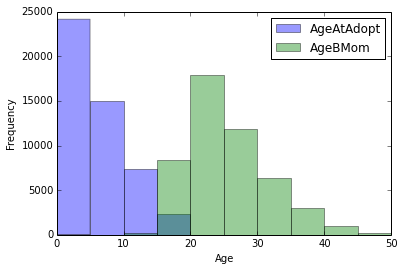

In [60]:
%matplotlib inline
df_age_int.plot(kind='hist', alpha=0.4)
plt.xlabel('Age')